# Exercise 3 - Linear regression optimisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

a) Read the data in separate variables for the training and test sets.

In [2]:
dataset_train = pd.read_csv('overfitting_train.csv')
dataset_test = pd.read_csv('overfitting_test.csv')

In [3]:
dataset_train.head()

,x,y
0,-1.000000,-1.859783
1,0.333333,2.768337
2,1.666667,3.246021
3,3.000000,1.784168
4,4.333333,2.175140


In [4]:
X_train = dataset_train['x'].values
y_train = dataset_train['y'].values
X_test = dataset_test['x'].values
y_test = dataset_test['y'].values

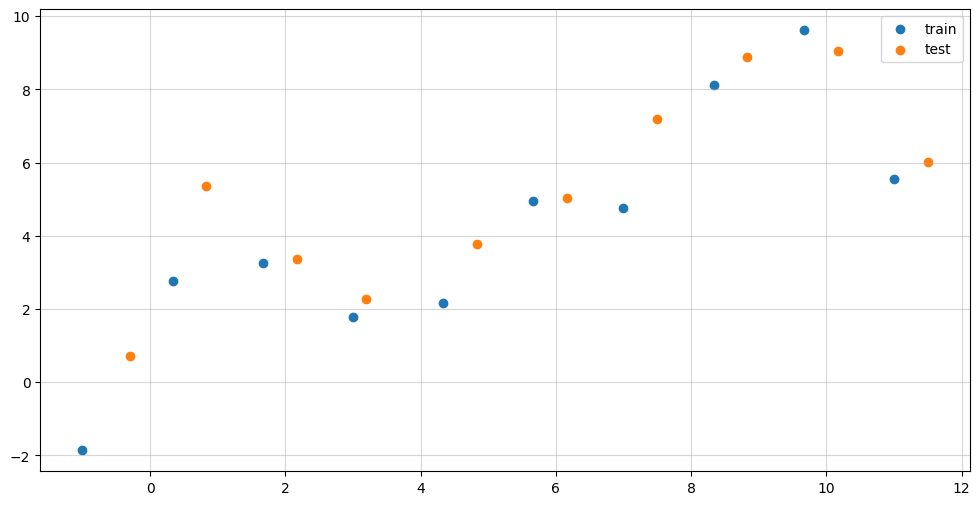

In [5]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.legend(['train', 'test']);

b) Define a cost function
$J(θ)$
that will allow you to compute the cost on the training and
cross-validation sets.


$$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$$

where $h_{\theta}(\mathbf{x}_{n})$ is your prediction.

In [6]:
def compute_cost(y_pred, y_true):
    N = y_pred.shape[0]
    return (1.0 / (2.0 * N)) * np.sum((y_pred - y_true)**2)

c) Perform the training for increasing orders $O= 1 ,..., 10$.

You can use any training method developed in the previous practical work. Using the [normal equation](http://mlwiki.org/index.php/Normal_Equation) is probably the easiest choice.

In [7]:
# TODO: implement the training method. The pseudo-code here is mostly for the normal equation. Adapt to your needs.

def rendre_vecteur_1d(x: np.array) -> np.array:
    x = np.asarray(x, dtype=float)
    if x.ndim > 1:
        x = x.reshape(-1)
    return x

def construire_matrice_poly(X: np.array, order: int) -> np.array:
    X = rendre_vecteur_1d(X)
    N = X.shape[0]
    M = np.ones((N, order + 1))  # colonne de biais X^0
    for p in range(1, order + 1):
        M[:, p] = X ** p
    return M

def fit(X_train: np.array, y_train: np.array, order: int) -> np.array:
    X_train = rendre_vecteur_1d(X_train)
    y_train = rendre_vecteur_1d(y_train)

    # biais + puissances
    X_design = construire_matrice_poly(X_train, order)

    # thetas = (X^T X)^(-1) X^T y
    thetas = np.linalg.pinv(X_design.T @ X_design) @ (X_design.T @ y_train)

    return thetas

def predict(thetas: np.array, X: np.array) -> np.array:

    thetas = rendre_vecteur_1d(thetas)
    X = rendre_vecteur_1d(X)

    # y = theta0*X^0 + theta1*X^1 + ... + thetaK*X^K
    y_pred = np.zeros_like(X, dtype=float)
    for power, theta in enumerate(thetas):
        y_pred += theta * (X ** power)

    return y_pred

Order=1; cost on train set: 1.41 - cost on test set: 1.68
Order=2; cost on train set: 1.35 - cost on test set: 1.61
Order=3; cost on train set: 1.31 - cost on test set: 1.54
Order=4; cost on train set: 0.20 - cost on test set: 1.03
Order=5; cost on train set: 0.20 - cost on test set: 0.98
Order=6; cost on train set: 0.14 - cost on test set: 2.19
Order=7; cost on train set: 0.12 - cost on test set: 4.74
Order=8; cost on train set: 1.07 - cost on test set: 2.13
Order=9; cost on train set: 1.11 - cost on test set: 2.75
Order=10; cost on train set: 1.48 - cost on test set: 27.21


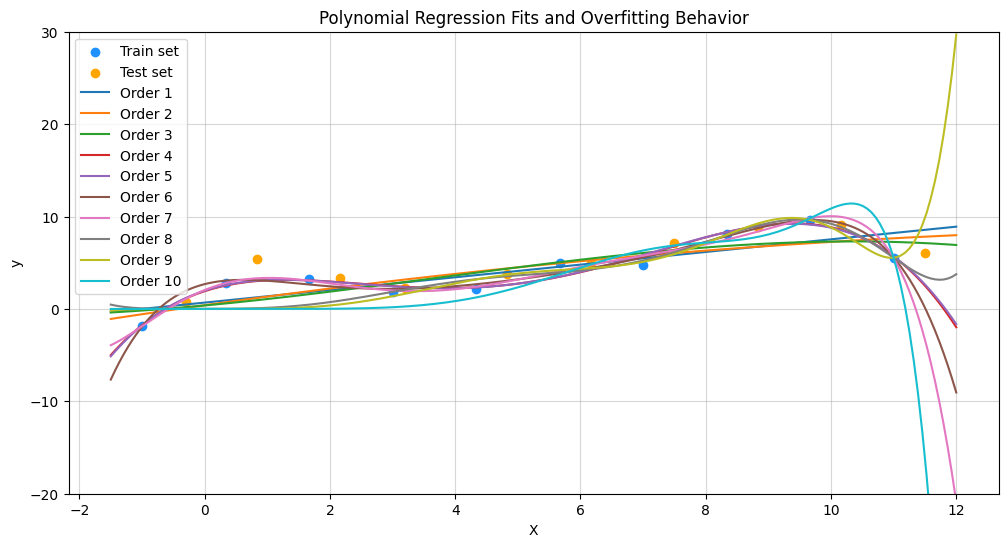

In [8]:
# Figure et nuages de points 
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)

# train test points
plt.scatter(X_train, y_train, color='dodgerblue', label='Train set')
plt.scatter(X_test, y_test, color='orange', label='Test set')

# Axe x
x_unseen = np.linspace(min(X_train.min(), X_test.min()) - 0.5,
                       max(X_train.max(), X_test.max()) + 0.5,
                       200)

train_cost_curve = []
test_cost_curve = []

# Boucle sur les degrés - on a choisi 1 à 11
for order in range(1, 11):

    # entraônement des thetas du poly
    thetas = fit(X_train, y_train, order)

    # Coûts sur train et test
    y_pred_train = predict(thetas, X_train)
    cost_train = compute_cost(y_pred_train, y_train)
    train_cost_curve.append(cost_train)

    y_pred_test = predict(thetas, X_test)
    cost_test = compute_cost(y_pred_test, y_test)
    test_cost_curve.append(cost_test)

    # courbes
    y_pred_line = predict(thetas, x_unseen)
    plt.plot(x_unseen, y_pred_line, label=f'Order {order}')

    print(f"Order={order}; cost on train set: {cost_train:.2f} - cost on test set: {cost_test:.2f}")

# Légende propre
plt.legend()
plt.ylim(-20, 30)
plt.title("Polynomial Regression Fits and Overfitting Behavior")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


e) Plot the evolution of the costs
$J_{train}(θ)$ and $J_{cv}(θ)$
as a function of the order O.

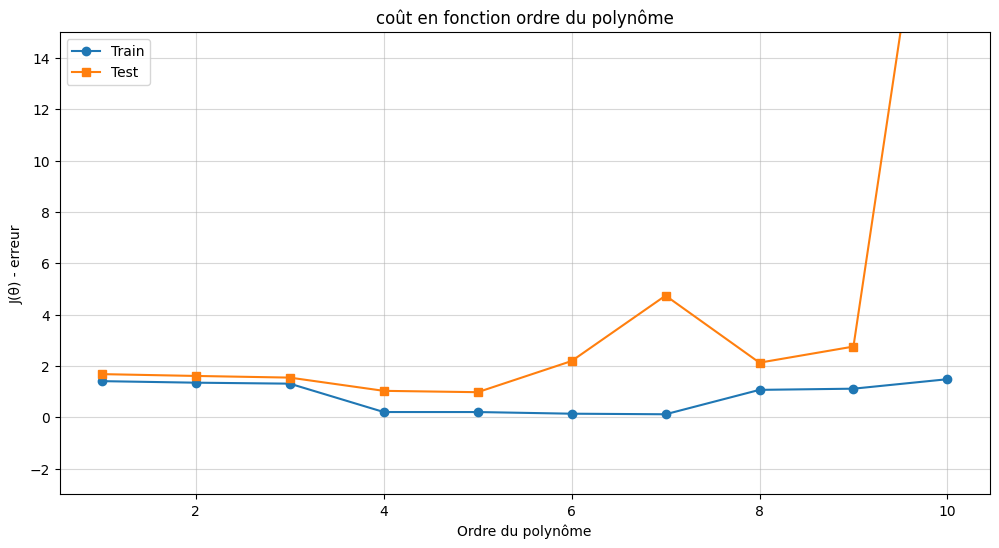

In [9]:
# step = 1
x_order = np.arange(1, 11, 1)

plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.plot(x_order, train_cost_curve, marker='o')
plt.plot(x_order, test_cost_curve, marker='s')
plt.ylim(-3, 15)


plt.title("coût en fonction ordre du polynôme")
plt.xlabel("Ordre du polynôme")
plt.ylabel("J(θ) - erreur")

plt.legend(['Train', 'Test'])
plt.show()

## Zoom sur certains résultats pour meilleure compréhension visuelle

Order=3; cost on train set: 1.31 - cost on test set: 1.54
Order=4; cost on train set: 0.20 - cost on test set: 1.03
Order=5; cost on train set: 0.20 - cost on test set: 0.98
Order=6; cost on train set: 0.14 - cost on test set: 2.19


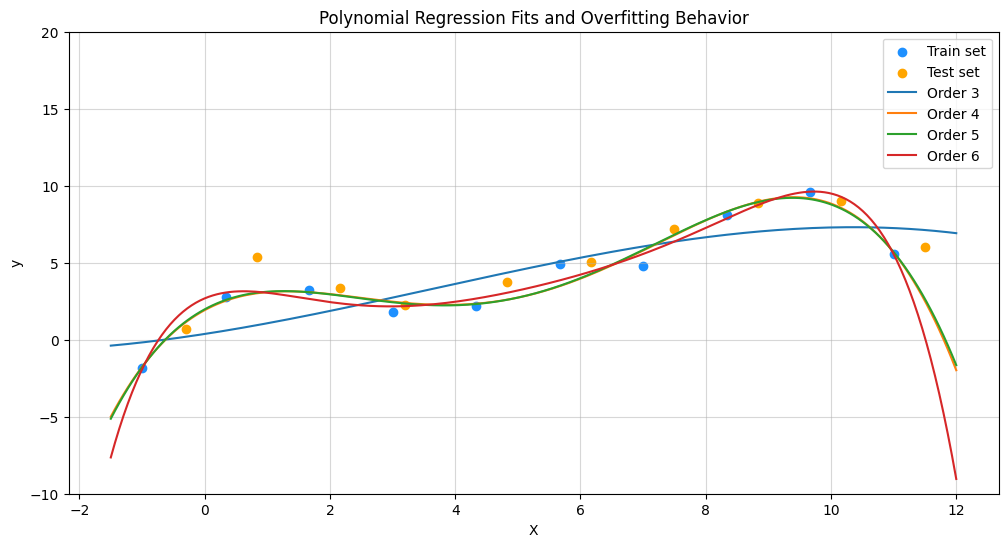

In [10]:
# Figure et nuages de points 
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)

# train test points
plt.scatter(X_train, y_train, color='dodgerblue', label='Train set')
plt.scatter(X_test, y_test, color='orange', label='Test set')

train_cost_curve = []
test_cost_curve = []

# Boucle sur les degrés - on a choisi 1 à 11
for order in range(3, 7):

    # entraônement des thetas du poly
    thetas = fit(X_train, y_train, order)

    # Coûts sur train et test
    y_pred_train = predict(thetas, X_train)
    cost_train = compute_cost(y_pred_train, y_train)
    train_cost_curve.append(cost_train)

    y_pred_test = predict(thetas, X_test)
    cost_test = compute_cost(y_pred_test, y_test)
    test_cost_curve.append(cost_test)

    # courbes
    y_pred_line = predict(thetas, x_unseen)
    plt.plot(x_unseen, y_pred_line, label=f'Order {order}')

    print(f"Order={order}; cost on train set: {cost_train:.2f} - cost on test set: {cost_test:.2f}")

# Légende propre
plt.legend()
plt.ylim(-10, 20)
plt.title("Polynomial Regression Fits and Overfitting Behavior")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


**f) What is your best model according to these costs ? Comment your answer.**

Les meilleurs modèles en termes de minimisation du coût sur le test set sont ceux correspondant aux polynômes de degré 4 et 5.
Visuellement, on remarque que même si les courbes sont moins lisses que pour les degrés inférieurs, elles conservent des oscillations modérées.

À partir du 6ème degré, on observe un overfitting marqué : le coût d’entraînement continue de diminuer alors que celui du test augmente.

Nous avons donc choisi le polynôme de degré 4, car il présente un coût aussi faible que celui du 5ème, tout en surajustant moins les données => meilleure capacité de généralisation.

**g) Would you still choose the model with the lowest cost for production?**

Tout d'abord, le choix du modèle pour la production dépend considérablement du use case. En industrie, il n’y a pas que l’accuracy qui compte : certaines contraintes business entrent forcément en jeu.

Dans un cas plus générique, on ne cherche pas uniquement l’accuracy ; nous aurions choisi le meilleur trade-off entre précision et surapprentissage. C’est-à-dire celui offrant le meilleur équilibre entre performance et généralisation.

En traçant les coûts train et test, nous avons déjà une bonne idée du comportement du modèle et de son overfit. Lorsque la courbe du train continue de baisser alors que celle du test augmente, cela signifie que le modèle est en train d’apprendre le jeu d’entraînement par cœur, d’où l’importance d’avoir un test set bien défini, représentant réellement les données sur terrain.

Dans le cas des résultats, nous aurions tout de même choisi le 4ème, voire le 3ème, car les polynômes présentent des valeurs de y très basses pour des x situés avant et après ceux du dataset. Ainsi, si l’on souhaite une généralisation correcte pour des cas extrêmes, nous pourrions même choisir le polynôme de degré 3.

**h) Explain how under/over-fitting is involved here.**


- Underfitting : lorsque le modèle est trop simple, c’est-à-dire pour les polynômes de faible degré (par exemple ordre 1 ou 2), la courbe est générallement très lisse. La courbe ne capture pas forcément la tendance réelle des données, et les coûts sont élevés à la fois sur le train set et sur le test set. Le modèle généralise mal parce qu’il n’apprend pas assez.

- Ooverfitting : lorsque le modèle devient trop complexe, comme pour les polynômes d’ordre 6 et au-delà. Ici le modèle s’ajuste presque parfaitement aux points du train set. Le coût train devient très faible mais la performance sur le test set se dégrade car il y a un surapprentissage. En effet, le modèle apprend le bruit et les particularités du train set plutôt que les caractéristiques générales.

Visuellement, on voit que plus l’ordre augmente, plus la courbe ondule pour passer par tous les points du jeu d’entraînement, ce qui illustre parfaitement le surapprentissage.